In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_uber_data = pd.merge(city_df, ride_df, how='outer', on='city')

 



In [3]:
# Display the data table for preview
combined_uber_data.head(20)


city  driver_count   type                 date   fare  \
0   Richardfort            38  Urban  2018-02-24 08:40:38  13.93   
1   Richardfort            38  Urban  2018-02-13 12:46:07  14.00   
2   Richardfort            38  Urban  2018-02-16 13:52:19  17.92   
3   Richardfort            38  Urban  2018-02-01 20:18:28  10.26   
4   Richardfort            38  Urban  2018-04-17 02:26:37  23.00   
5   Richardfort            38  Urban  2018-04-21 03:44:04   9.54   
6   Richardfort            38  Urban  2018-02-03 00:14:26  29.04   
7   Richardfort            38  Urban  2018-02-08 15:50:12  16.55   
8   Richardfort            38  Urban  2018-04-03 15:07:34  40.77   
9   Richardfort            38  Urban  2018-02-19 14:09:20  27.11   
10  Richardfort            38  Urban  2018-04-22 03:06:56  39.74   
11  Richardfort            38  Urban  2018-01-31 14:51:01  43.92   
12  Richardfort            38  Urban  2018-03-04 22:13:57  14.83   
13  Richardfort            38  Urban  2018-03-28 19:33:00   7.75   
14  Richardfort            38  Urban  2018-02-14 03:27:28  44.11   
15  Richardfort            38  Urban  2018-04-27 11:59:25  30.31   
16  Richardfort            38  Urban  2018-03-03 11:57:24  11.42   
17  Richardfort            38  Urban  2018-01-13 10:08:54  25.81   
18  Richardfort            38  Urban  2018-03-06 12:53:05   8.28   
19  Richardfort            38  Urban  2018-02-05 16:12:04  42.22   

          ride_id  
0   5628545007794  
1    910050116494  
2    820639054416  
3   9554935945413  
4    720020655850  
5   3698147103219  
6   4982665519010  
7   2270463070874  
8   9496210735824  
9   8690324801449  
10  4081388893008  
11  4066949857460  
12  9474112834050  
13  5539056178883  
14  2503858662225  
15  6106446829435  
16  2916078036620  
17  9110913538598  
18  5127600643309  
19  4051093040264

In [4]:
# Determine variables for plotting.

# Sorts for city type.
urban_sort = combined_uber_data.type == 'Urban'
sorted_urban = combined_uber_data[urban_sort]

suburban_sort = combined_uber_data.type == 'Suburban'
sorted_suburban = combined_uber_data[suburban_sort]

rural_sort = combined_uber_data.type == 'Rural'
sorted_rural = combined_uber_data[rural_sort]

# Counts of rides per city type.
urban_count = sorted_urban['type'].count()

suburban_count = sorted_suburban['type'].count()

rural_count = sorted_rural['type'].count()

total_count = combined_uber_data['type'].count()

# Total rides per city by city type: x axis.
group_urban_ride = pd.DataFrame(sorted_urban.groupby(['city'])['type'].count()).rename(columns = {'type': 'Ride Count'}).reset_index()

group_suburban_ride = pd.DataFrame(sorted_suburban.groupby(['city'])['type'].count()).rename(columns = {'type': 'Ride Count'}).reset_index()

group_rural_ride = pd.DataFrame(sorted_rural.groupby(['city'])['type'].count()).rename(columns = {'type': 'Ride Count'}).reset_index()

# Driver count per city per city type: bubble size.
group_urban_driver = pd.DataFrame(sorted_urban.groupby(['city'])['driver_count'].first()).reset_index()

group_suburban_driver = pd.DataFrame(sorted_suburban.groupby(['city'])['driver_count'].first()).reset_index()

group_rural_driver = pd.DataFrame(sorted_rural.groupby(['city'])['driver_count'].first()).reset_index()

# Average fair per city per city type: y axis.
group_urban_fare = pd.DataFrame(sorted_urban.groupby(['city'])['fare'].mean()).rename(columns = {'fare': 'Average fare'}).reset_index()

group_suburban_fare = pd.DataFrame(sorted_suburban.groupby(['city'])['fare'].mean()).rename(columns = {'fare': 'Average fare'}).reset_index()

group_rural_fare = pd.DataFrame(sorted_rural.groupby(['city'])['fare'].mean()).rename(columns = {'fare': 'Average fare'}).reset_index()





## Bubble Plot of Ride Sharing Data

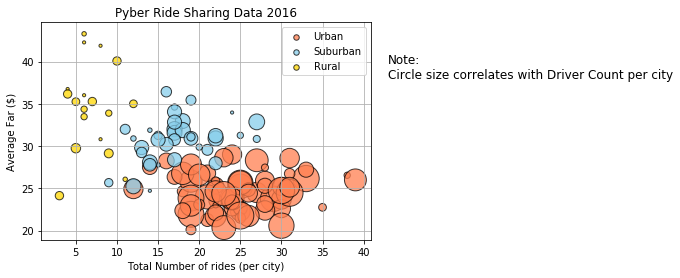

In [5]:
# Build the scatter plots for each city types.
fig = plt.figure(figsize=(13,4))

ax = fig.add_subplot(121)

ax.scatter(group_urban_ride['Ride Count'], group_urban_fare['Average fare'], 
           marker = 'o', color = 'coral', label = 'Urban', alpha = .75, edgecolors = 'black',
           s = group_urban_driver['driver_count'] * 10)

ax.scatter(group_suburban_ride['Ride Count'], group_suburban_fare['Average fare'], 
           marker = 'o', color = 'skyblue', label = 'Suburban', alpha = .75, edgecolors = 'black',
           s = group_suburban_driver['driver_count'] * 10)

ax.scatter(group_rural_ride['Ride Count'], group_rural_fare['Average fare'], 
           marker = 'o', color = 'gold', label = 'Rural', alpha = .75, edgecolors = 'black',
           s = group_rural_driver['driver_count'] * 10)

# Incorporate the other graph properties.
plt.grid()
plt.xlabel('Total Number of rides (per city)')
plt.ylabel('Average Far ($)')
plt.title('Pyber Ride Sharing Data 2016')

# Create a legend.
lgnd = plt.legend()
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size.
plt.text(43, 38, s ='Note:\nCircle size correlates with Driver Count per city', fontsize = 12)
plt.show()

# Save Figure.
fig.savefig('./Saved Figures/bubble_plot_rideshare.png')


## Total Fares by City Type

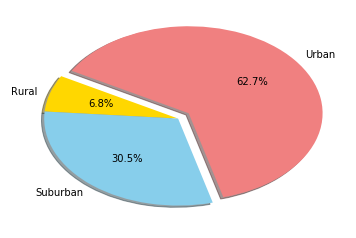

In [9]:
# Calculate Type Percents.
urban_fares = (sorted_urban['fare'].sum()).round(2)

suburban_fares = (sorted_suburban['fare'].sum()).round(2)

rural_fares = (sorted_rural['fare'].sum()).round(2)

# Build Pie Chart.
labels = ['Urban','Rural', 'Suburban']
sizes = [urban_fares, rural_fares, suburban_fares]
colors = ['lightcoral', 'gold', 'skyblue']
explode = [.1, 0, 0]

plt.pie(sizes, explode = explode, labels = labels, colors = colors,
        autopct="%1.1f%%", startangle=285, shadow = True)
# Save Figure.
plt.savefig('./Saved Figures/Total_fares_pie.png')



## Total Rides by City Type

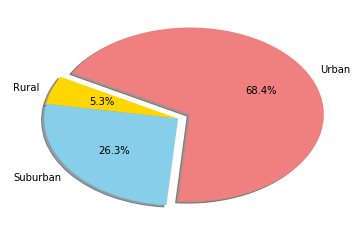

In [7]:
# Calculate Ride Percents
urban_percent = (100 * (urban_count / total_count)).round(2)

suburban_percent = (100 * (suburban_count / total_count)).round(2)

rural_percent  = (100 * (rural_count / total_count)).round(2)

labels = ['Urban','Rural', 'Suburban']
sizes = [urban_percent, rural_percent, suburban_percent]
colors = ['lightcoral', 'gold', 'skyblue']
explode = [.1, 0, 0]

# Build Pie Chart
plt.pie(sizes, explode = explode, labels = labels, colors = colors, autopct="%1.1f%%", startangle=265, shadow = True)

# Save Figure
plt.savefig('./Saved Figures/Total_rides_city_pie.png')


## Total Drivers by City Type

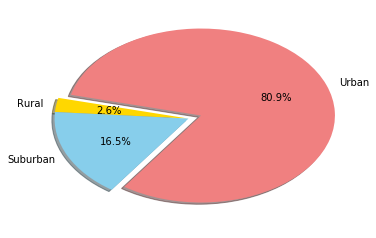

In [8]:
# Calculate Driver Percents.
urban_driver_total = group_urban_driver['driver_count'].sum()

suburban_driver_total = group_suburban_driver['driver_count'].sum()

rural_driver_total = group_rural_driver['driver_count'].sum()

# Build Pie Charts.
labels = ['Urban','Rural', 'Suburban']
sizes = [urban_driver_total, rural_driver_total, suburban_driver_total]
colors = ['lightcoral', 'gold', 'skyblue']
explode = [.1, 0, 0]

plt.pie(sizes, explode = explode, labels = labels, colors = colors, autopct="%1.1f%%", startangle=235, shadow = True)

# Save Figure
plt.savefig('./Saved Figures/Total_drivers_percity_pie.png')